In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
#Import Taxi June 2015 data
june_2015_taxi = pd.read_csv("clean_csvs/taxi_june_2015.csv")

#Import Taxi June 2019 data
june_2019_taxi = pd.read_csv("clean_csvs/taxi_june_2019.csv")

#Import FHV June 2015 data
june_2015_fhv = pd.read_csv("clean_csvs/FHV_june_2015.csv")

#Import FHV June 2019 csv data
june_2019_highvol = pd.read_csv("clean_csvs/HighVol_june_2019.csv")

In [4]:
#Taxi data June 2015
#count number of rides by date
ride_numbers_june_2015 = june_2015_taxi["tpep_pickup_datetime"].value_counts()

#Format data frame and sort
ride_numbers_june_2015_df = pd.DataFrame(ride_numbers_june_2015).reset_index().rename(columns = {"index": "Pickup Date", "tpep_pickup_datetime": "Number of Rides June 2015"})
ride_numbers_june_2015_df["Pickup Date"] = pd.to_datetime(ride_numbers_june_2015_df["Pickup Date"]).dt.strftime('%m-%d')
sorted_ride_numbers_june_2015 = ride_numbers_june_2015_df.sort_values(by = "Pickup Date")

#Display data frame
sorted_ride_numbers_june_2015.head()

,Pickup Date,Number of Rides June 2015
21,06-01,34676
18,06-02,36050
15,06-03,36394
10,06-04,39663
4,06-05,43779


In [5]:
#Taxi data June 2019
#Count number of rides by date for June 2019 taxi data
ride_numbers_june_2019 = june_2019_taxi["pickup_date"].value_counts()

#Format data frame and sort
ride_numbers_june_2019_df = pd.DataFrame(ride_numbers_june_2019).reset_index().rename(columns = {"index": "Pickup Date", "pickup_date": "Number of Rides June 2019"})
ride_numbers_june_2019_df["Pickup Date"] = pd.to_datetime(ride_numbers_june_2019_df["Pickup Date"]).dt.strftime('%m-%d')
sorted_ride_numbers_june_2019 = ride_numbers_june_2019_df.sort_values(by = "Pickup Date")

#Display data frame
sorted_ride_numbers_june_2019.head()

,Pickup Date,Number of Rides June 2019
0,06-01,9742
15,06-02,8084
21,06-03,7537
20,06-04,7570
5,06-05,8650


In [6]:
#FHV data June 2015
#Count number of rides by date for June 2015 FHV data
ride_numbers_fhv_june_2015 = june_2015_fhv["pickup_date"].value_counts()

#Format data frame and sort
ride_numbers_fhv_june_2015 = pd.DataFrame(ride_numbers_fhv_june_2015).reset_index().rename(columns = {"index": "Pickup Date", "pickup_date": "Number of FHV Rides 2015"})
ride_numbers_fhv_june_2015["Pickup Date"] = pd.to_datetime(ride_numbers_fhv_june_2015["Pickup Date"]).dt.strftime('%m-%d')
sorted_ride_numbers_fhv_2015 = ride_numbers_fhv_june_2015.sort_values(["Pickup Date"], ascending = True)

#Display data frame
sorted_ride_numbers_fhv_2015.head()

,Pickup Date,Number of FHV Rides 2015
5,06-01,1362
6,06-02,1341
17,06-03,1177
11,06-04,1276
0,06-05,1475


In [7]:
#FHV data June 2019
#Find ride numbers by pickup date
ride_numbers_hvfhv_june_2019 = june_2019_highvol["pickup_date"].value_counts()

#Format and sort data frame
ride_numbers_hvfhv_june_2019 = pd.DataFrame(ride_numbers_hvfhv_june_2019).reset_index().rename(columns = {"index": "Pickup Date", "pickup_date": "Number of FHV Rides 2019"})
ride_numbers_hvfhv_june_2019["Pickup Date"] = pd.to_datetime(ride_numbers_hvfhv_june_2019["Pickup Date"]).dt.strftime('%m-%d')
sorted_ride_numbers_hvfhv_june = ride_numbers_hvfhv_june_2019.sort_values(["Pickup Date"], ascending = True)

#Display data frame
sorted_ride_numbers_hvfhv_june.head()

,Pickup Date,Number of FHV Rides 2019
0,06-01,10622
3,06-02,9432
27,06-03,7088
26,06-04,7378
17,06-05,8125


In [8]:
#Compare taxi and FHV data in June 2015
combined_june_2015 = sorted_ride_numbers_june_2015.merge(sorted_ride_numbers_fhv_2015, how = "outer", on = "Pickup Date")
combined_june_2015["Total Rides"] = combined_june_2015["Number of Rides June 2015"] + combined_june_2015["Number of FHV Rides 2015"]

#Display data frame
combined_june_2015.head()

,Pickup Date,Number of Rides June 2015,Number of FHV Rides 2015,Total Rides
0,06-01,34676,1362,36038
1,06-02,36050,1341,37391
2,06-03,36394,1177,37571
3,06-04,39663,1276,40939
4,06-05,43779,1475,45254
5,06-06,51578,1061,52639
6,06-07,41462,854,42316
7,06-08,32621,1152,33773
8,06-09,33629,1160,34789
9,06-10,36078,1211,37289


In [9]:
#Calculate the percent of taxi rides vs FHV rides
percent_rides_taxi = combined_june_2015["Number of Rides June 2015"]/combined_june_2015["Total Rides"] * 100
percent_rides_fhv = combined_june_2015["Number of FHV Rides 2015"]/combined_june_2015["Total Rides"] * 100

#Create new data frame
percent_2015 = pd.DataFrame({"Date": combined_june_2015["Pickup Date"],
                            "Percent Rides Taxi": percent_rides_taxi,
                            "Percent Rides FHV": percent_rides_fhv
                            })

percent_2015.head()

,Date,Percent Rides Taxi,Percent Rides FHV
0,06-01,96.220656,3.779344
1,06-02,96.413575,3.586425
2,06-03,96.867265,3.132735
3,06-04,96.883168,3.116832
4,06-05,96.740620,3.259380
5,06-06,97.984384,2.015616
6,06-07,97.981851,2.018149
7,06-08,96.588991,3.411009
8,06-09,96.665613,3.334387
9,06-10,96.752393,3.247607


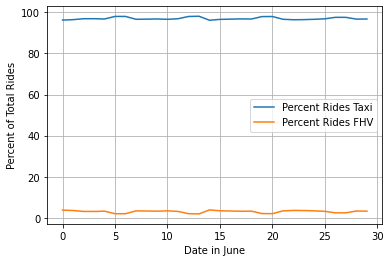

In [22]:
#Line graph comparing percent of total rides for taxi vs FHV in June 2015
line = percent_2015.plot(kind = "line", legend = True)

plt.title("Percent Taxi vs FHV Rides June 2015")
plt.xlabel("Date in June")
plt.ylabel("Percent of Total Rides")
plt.grid()
plt.show()

In [12]:
#Compare taxi and FHV data in June 2019
combined_june_2019 = sorted_ride_numbers_june_2019.merge(sorted_ride_numbers_hvfhv_june, how = "outer", on = "Pickup Date")
combined_june_2019["Total Rides"] = combined_june_2019["Number of Rides June 2019"] + combined_june_2019["Number of FHV Rides 2019"]

#Display data frame
combined_june_2019.head()

,Pickup Date,Number of Rides June 2019,Number of FHV Rides 2019,Total Rides
0,06-01,9742,10622,20364
1,06-02,8084,9432,17516
2,06-03,7537,7088,14625
3,06-04,7570,7378,14948
4,06-05,8650,8125,16775
5,06-06,8919,8379,17298
6,06-07,9265,9147,18412
7,06-08,8636,9550,18186
8,06-09,6948,8282,15230
9,06-10,7651,8112,15763


In [13]:
#Calculate the percent of taxi rides vs FHV rides
percent_rides_taxi = combined_june_2019["Number of Rides June 2019"]/combined_june_2019["Total Rides"] * 100
percent_rides_fhv = combined_june_2019["Number of FHV Rides 2019"]/combined_june_2019["Total Rides"] * 100

#Create new data frame
percent_2019 = pd.DataFrame({"Date": combined_june_2019["Pickup Date"],
                            "Percent Rides Taxi": percent_rides_taxi,
                            "Percent Rides FHV": percent_rides_fhv
                            })

#Display data frame
percent_2019.head()

,Date,Percent Rides Taxi,Percent Rides FHV
0,06-01,47.839324,52.160676
1,06-02,46.152090,53.847910
2,06-03,51.535043,48.464957
3,06-04,50.642226,49.357774
4,06-05,51.564829,48.435171
5,06-06,51.560874,48.439126
6,06-07,50.320443,49.679557
7,06-08,47.487078,52.512922
8,06-09,45.620486,54.379514
9,06-10,48.537715,51.462285


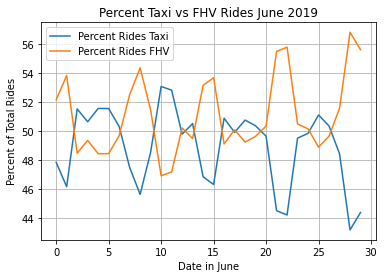

In [25]:
#Line graph comparing percent of total rides for taxi vs FHV in June 2019
line = percent_2019.plot(kind = "line", legend = True)

plt.title("Percent Taxi vs FHV Rides June 2019")
plt.xlabel("Date in June")
plt.ylabel("Percent of Total Rides")
plt.grid()
plt.show()

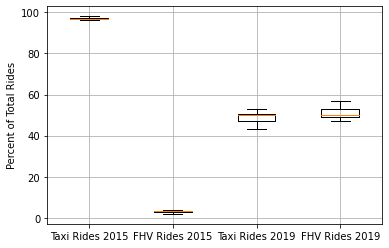

In [19]:
#Compile data for boxplot
plot_data = [percent_2015["Percent Rides Taxi"], percent_2015["Percent Rides FHV"], percent_2019["Percent Rides Taxi"], percent_2019["Percent Rides FHV"]]

#Create boxplot comparing percentage of rides from June 2015 to June 2019
plt.boxplot(plot_data, labels = ["Taxi Rides 2015", "FHV Rides 2015", "Taxi Rides 2019", "FHV Rides 2019"])

plt.title
plt.ylabel("Percent of Total Rides")
plt.grid()
plt.show()

In [23]:
#T-test comparing change in percent taxi rides
stats.ttest_ind(percent_2015["Percent Rides Taxi"], percent_2019["Percent Rides Taxi"], equal_var=False)

Ttest_indResult(statistic=95.50902539281188, pvalue=1.0343156277768903e-40)

In [24]:
#T-test comparing change in percent FHV rides
stats.ttest_ind(percent_2015["Percent Rides FHV"], percent_2019["Percent Rides FHV"], equal_var=False)

Ttest_indResult(statistic=-95.50902539281185, pvalue=1.03431562777692e-40)